<table class="table">
    <tr>
        <th style="text-align:left; vertical-align: middle; width:15%">
            <img src='img/image.png' style="height: 110px; ">
        </th>
        <th style="text-align:right; vertical-align: middle;">
            <h3>SMT203: Smart City Systems and Management</h3>
            <h3>Academic Year 2018/19</h3>
            <h3>Term 2</h3>
        </th>
    </tr>
</table>

# SMUFinder Telegram Bot - Data Visualisation
**Done by:** Jamie Yeo Jin Yih

**SMUFinder Telegram Bot** strives to improve SMU’s existing unofficial online Lost & Found system on Telegram through a dedicated one-stop platform that allows users to report found items via a Telegram bot - SMUFinder. To enhance the item searching process, all found items reported are categorised, and all filtered search results are displayed on a webpage. 

Ultimately, this aims to provide students with a more seamless lost & found reporting process in SMU.
<hr>

In [1]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

We will first try to plot data from an `API GET` call. 

In [2]:
import requests
import json

url_psi = 'https://smufinderapi.herokuapp.com/report/'
params = {'date':'2019-04-04'}

r = requests.get(url = url_psi, params=params)
result = r.json()#convert to json format
print(json.dumps(result, indent=2, sort_keys=True))


[
  {
    "found_at_building": "SIS",
    "found_at_facilities": "L3 Female Toilet",
    "founder": 111111111,
    "item_description": "Black Wallet",
    "itemtype": "Wallet",
    "left_at_building": "SIS",
    "left_at_facilities": "L3 Female Toilet",
    "photo": "photo1",
    "retriever": 111111111,
    "rid": 1,
    "status": "expired",
    "timestamp": "Fri, 05 Apr 2019 07:21:55 GMT"
  },
  {
    "found_at_building": "SIS",
    "found_at_facilities": "L3 Female Toilet",
    "founder": 111111112,
    "item_description": "White Wallet",
    "itemtype": "Wallet",
    "left_at_building": "SIS",
    "left_at_facilities": "L2 Female Toilet",
    "photo": "photo2",
    "retriever": 111111112,
    "rid": 2,
    "status": "expired",
    "timestamp": "Fri, 05 Apr 2019 07:22:02 GMT"
  },
  {
    "found_at_building": "SIS",
    "found_at_facilities": "SIS project way",
    "founder": 111111113,
    "item_description": "Mac Charger",
    "itemtype": "Laptop Charger",
    "left_at_building": "

In the case of a real-life deployment of the bot, there may be a large number of records, hence it may be useful to know how many found reports are recorded.

As this is a test case, only 14 reports are recorded solely for visualisation purposes.

In [3]:
print(len(result))

14


We will proceed to load the entire JSON response into a `dataframe`. We use json_normalize here, because the readings is a nested dictionary.



In [4]:
from pandas.io.json import json_normalize

df_reports = json_normalize(result) #
df_reports.head() #view first 5 reports

,found_at_building,found_at_facilities,founder,item_description,itemtype,left_at_building,left_at_facilities,photo,retriever,rid,status,timestamp
0,SIS,L3 Female Toilet,111111111,Black Wallet,Wallet,SIS,L3 Female Toilet,photo1,111111111.0,1,expired,"Fri, 05 Apr 2019 07:21:55 GMT"
1,SIS,L3 Female Toilet,111111112,White Wallet,Wallet,SIS,L2 Female Toilet,photo2,111111112.0,2,expired,"Fri, 05 Apr 2019 07:22:02 GMT"
2,SIS,SIS project way,111111113,Mac Charger,Laptop Charger,SIS,SIS project way,photo3,111111113.0,3,retrieved,"Fri, 05 Apr 2019 07:22:28 GMT"
3,SIS,SIS project way,111111114,Mac Charger,Laptop Charger,SIS,SIS project way,photo3,111111114.0,4,retrieved,"Fri, 05 Apr 2019 07:23:36 GMT"
4,SIS,SIS project way,111111115,Acer Charger,Laptop Charger,SIS,SIS project way,photo3,111111115.0,5,retrieved,"Fri, 05 Apr 2019 07:23:41 GMT"


<hr>
# Data Visualisation

We will now plot `graphs` that depict interesting trends extracted from all data collected from our SMUFinder telegram bot.
<hr>

## 1. Facility in SIS with highest number of found items reported

In [5]:
count_locations = df_reports.groupby('found_at_facilities')
count_locations1 = count_locations.size().reset_index(name='count_locations')
# count_locations1 = go.Bar(x=df_reports['found_at_facilities'], y = name='df_reports')
# data = [trace_females]
# iplot(data)
count_locations1

,found_at_facilities,count_locations
0,GSR-2-2,1
1,GSR-3-3,1
2,L2 Printing Rm,2
3,L3 Female Toilet,2
4,L3 Printing Rm,1
5,SIS project way,5
6,SR-3-1,1
7,SR-3-2,1


In [31]:
results = go.Bar(x=count_locations1['found_at_facilities'], y=count_locations1['count_locations'], name='found_at_facilities')
data = [results]

layout = go.Layout(title='Facility in SIS with highest number of found items reported', 
                   xaxis={'title':'Facilities in SIS'}, 
                   yaxis={'title':'No. of items reported found'}, showlegend=True, legend=dict(x=1, y=1)) 

fig = go.Figure(data=data, layout=layout)
iplot(fig)


For this test case, it is easy to identify **SIS project** way as being the facility with the highest number of found items reported. However, in a real life deployment, the differences may not be as stark.

We will hence conduct a thorough analysis to extract a more accurate information of the facility with the highest number of found items reported.

In [7]:
max_facility = count_locations1.loc[count_locations1['count_locations'].idxmax()]
max_facility

found_at_facilities    SIS project way
count_locations                      5
Name: 5, dtype: object

From the `bar graph` and our above analsis, we confirm that **SIS Project Way** is the SIS facility with the highest number of found items reported.
<hr>

## 1.1 Most common item type found in abovementioned location

We are next interested in finding out what sort of item is/are most commonly left behind at the abovementioned location.

Filter out all found reports for the abovementioned location (SIS Project Way).

In [8]:
max_facility_itemtype = df_reports[df_reports['found_at_facilities'].isin(['SIS project way'])]
max_facility_itemtype  #need to input more diff itemtype

,found_at_building,found_at_facilities,founder,item_description,itemtype,left_at_building,left_at_facilities,photo,retriever,rid,status,timestamp
2,SIS,SIS project way,111111113,Mac Charger,Laptop Charger,SIS,SIS project way,photo3,111111113.0,3,retrieved,"Fri, 05 Apr 2019 07:22:28 GMT"
3,SIS,SIS project way,111111114,Mac Charger,Laptop Charger,SIS,SIS project way,photo3,111111114.0,4,retrieved,"Fri, 05 Apr 2019 07:23:36 GMT"
4,SIS,SIS project way,111111115,Acer Charger,Laptop Charger,SIS,SIS project way,photo3,111111115.0,5,retrieved,"Fri, 05 Apr 2019 07:23:41 GMT"
5,SIS,SIS project way,111111116,HP Charger,Laptop Charger,SIS,SIS project way,photo3,111111116.0,6,retrieved,"Fri, 05 Apr 2019 07:23:44 GMT"
6,SIS,SIS project way,111111117,Asus Charger,Laptop Charger,SIS,SIS project way,photo3,111111117.0,7,retrieved,"Fri, 05 Apr 2019 07:23:49 GMT"


Categorise all item types and extract their total count in abovementioned location (SIS Project Way).

In [9]:
max_facility_itemtype_count = max_facility_itemtype.groupby('itemtype')
max_facility_itemtype_count = max_facility_itemtype_count.size().reset_index(name='max_facility_itemtype_count')
max_facility_itemtype_count

,itemtype,max_facility_itemtype_count
0,Laptop Charger,5


Finally, plot a `pie chart` to showcase the spread of found and reported items with their proportion in SIS Project Way.

In [10]:
trace1 = go.Pie(labels=max_facility_itemtype_count['itemtype'], values=max_facility_itemtype_count['max_facility_itemtype_count'])

layout = go.Layout(title='Most common item type found in abovementioned location') 

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)


From the `pie chart`, we notice that **Laptop Charger** is the item type that is most commonly found and reported in SIS Project Way.
<hr>

## 2. Most commonly lost item type in SIS

Let's now take a look at all the item types discovered found and reported in SIS.

Categorise all item types and extract their total count in SIS.

In [11]:
count_itemtype = df_reports.groupby('itemtype')
count_itemtype1 = count_itemtype.size().reset_index(name='count_itemtype')
# count_locations1 = go.Bar(x=df_reports['found_at_facilities'], y = name='df_reports')
# data = [trace_females]
# iplot(data)
count_itemtype1

,itemtype,count_itemtype
0,Laptop Charger,5
1,Matriculation Card,4
2,Others,1
3,Wallet,3
4,Water Bottle,1


Plot a `pie chart` to showcase the spread of found and reported items with their proportion in SIS.

In [12]:
trace2 = go.Pie(labels=count_itemtype1['itemtype'], values=count_itemtype1['count_itemtype'])
layout = go.Layout(title='Most commonly lost item type in SIS') 

fig = go.Figure(data=[trace2], layout=layout)
iplot(fig)

In [13]:
results1 = go.Bar(x=count_itemtype1['itemtype'], y=count_itemtype1['count_itemtype'], name='count_itemtype1')
data = [results1]
layout = go.Layout(title='Most commonly lost item type in SIS', 
                   xaxis={'title':'Item Types'}, 
                   yaxis={'title':'No. of items reported found'}, showlegend=True, legend=dict(x=1, y=1)) 

fig = go.Figure(data=data, layout=layout)
iplot(fig)


For this test case, it is easy to identify **Laptop Charger** as being the item type with the highest number of found reported. However, in a real life deployment, the differences may not be as stark.

We will hence conduct a thorough analysis to extract a more accurate information of the item type with the highest number of found reports.

In [14]:
max_itemtype = count_itemtype1.loc[count_itemtype1['count_itemtype'].idxmax()]
max_itemtype

itemtype          Laptop Charger
count_itemtype                 5
Name: 0, dtype: object

From the `pie chart`, `bar graph` and our above analsis, we confirm that **Laptop Charger** is the item type with the highest number of found reported.

<hr>

## 2.1 Facility where the most commonly lost item is most found

Where can we usually find Laptop Chargers left behind? We are now interested in finding out which facility in SIS where Laptop Chargers are most commonly left behind.

Filter out all found reports for the abovementioned item type (Laptop Charger).

In [15]:
max_itemtype1 = df_reports[df_reports['itemtype'].isin(['Laptop Charger'])]
max_itemtype1

,found_at_building,found_at_facilities,founder,item_description,itemtype,left_at_building,left_at_facilities,photo,retriever,rid,status,timestamp
2,SIS,SIS project way,111111113,Mac Charger,Laptop Charger,SIS,SIS project way,photo3,111111113.0,3,retrieved,"Fri, 05 Apr 2019 07:22:28 GMT"
3,SIS,SIS project way,111111114,Mac Charger,Laptop Charger,SIS,SIS project way,photo3,111111114.0,4,retrieved,"Fri, 05 Apr 2019 07:23:36 GMT"
4,SIS,SIS project way,111111115,Acer Charger,Laptop Charger,SIS,SIS project way,photo3,111111115.0,5,retrieved,"Fri, 05 Apr 2019 07:23:41 GMT"
5,SIS,SIS project way,111111116,HP Charger,Laptop Charger,SIS,SIS project way,photo3,111111116.0,6,retrieved,"Fri, 05 Apr 2019 07:23:44 GMT"
6,SIS,SIS project way,111111117,Asus Charger,Laptop Charger,SIS,SIS project way,photo3,111111117.0,7,retrieved,"Fri, 05 Apr 2019 07:23:49 GMT"


Categorise all facilities and extract their total count for abovementioned item type (Laptop Charger).

In [16]:
count_max_itemtype1 = max_itemtype1.groupby('found_at_facilities')
count_max_itemtype_facilities = count_max_itemtype1.size().reset_index(name='count_max_itemtype_facilities')

count_max_itemtype_facilities


,found_at_facilities,count_max_itemtype_facilities
0,SIS project way,5


Finally, plot a `pie chart` and `bar graph` to showcase the spread of facilities where abovementioned item type (Laptop Charger) is found at.

In [17]:
trace4 = go.Pie(labels=count_max_itemtype_facilities['found_at_facilities'], values=count_max_itemtype_facilities['count_max_itemtype_facilities'])
layout = go.Layout(title='Facility where the most commonly lost item is most found') 

fig = go.Figure(data=[trace4], layout=layout)
iplot(fig)

In [18]:
results3 = go.Bar(x=count_max_itemtype_facilities['found_at_facilities'], y=count_max_itemtype_facilities['count_max_itemtype_facilities'], name='count_max_itemtype_facilities')
data = [results3]
layout = go.Layout(title='Facility where the most commonly lost item is most found', 
                   xaxis={'title':'Locations'}, 
                   yaxis={'title':'No. of items reported found'}, showlegend=True, legend=dict(x=1, y=1)) 

fig = go.Figure(data=data, layout=layout)
iplot(fig)
# need to input more facilities for there to be more bars since currently all chargers are lost at SIS pway


For this test case, it is easy to identify Laptop Charger as being the item type with the highest number of found reported. However, in a real life deployment, the differences may not be as stark.

We will hence conduct a thorough analysis to extract a more accurate information of the item type with the highest number of found reports.

In [19]:
max_itemtype_location = count_max_itemtype_facilities.loc[count_max_itemtype_facilities['count_max_itemtype_facilities'].idxmax()]
max_itemtype_location

found_at_facilities              SIS project way
count_max_itemtype_facilities                  5
Name: 0, dtype: object

From the `pie chart`, `bar graph` and our above analysis, we confirm that **SIS Project Way** is the facility in SIS where Laptop Chargers are most commonly left behind.

<hr>

## 3. Status distribution

Finally, we want to view the proportion of all found items reported that are
1. Available (no news within 2 weeks from found report posted)
2. Retrieved (retrieved within 2 weeks from found report posted)
3. Expired (after 2 weeks from found report posted)

Categorise all statuses and extract their total count in SIS.

In [20]:
status = df_reports.groupby('status')
count_status = status.size().reset_index(name='count_status')
count_status

,status,count_status
0,available,4
1,expired,2
2,retrieved,8


Plot a `bar graph` to showcase the number of item types that were available/expired/retrieved in SIS.

In [21]:
results4 = go.Bar(x=count_status['status'], y=count_status['count_status'], name='count_status')
data = [results4]
layout = go.Layout(title='Status distribution', 
                   xaxis={'title':'Status'}, 
                   yaxis={'title':'No. of items reported found'}, showlegend=True, legend=dict(x=1, y=1)) 

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Plot a `pie chart` to showcase the spread of found and reported items with their proportion in SIS.

In [22]:
trace5 = go.Pie(labels=count_status['status'], values=count_status['count_status'])
layout = go.Layout(title='Status distribution') 

fig = go.Figure(data=[trace5], layout=layout)
iplot(fig)

<hr>
## 3.1 Item type distribution by status

Let's now break down our analysis to dive into the distributed of item types based on each status.

In [23]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline
sns.set()
DIMS=(16, 6)

In [24]:
status1 = df_reports[['itemtype', 'status']]
status2 = status1.groupby(['itemtype', 'status']).size().reset_index(name="No. of items reported found")
status2

,itemtype,status,No. of items reported found
0,Laptop Charger,retrieved,5
1,Matriculation Card,available,1
2,Matriculation Card,retrieved,3
3,Others,available,1
4,Wallet,available,1
5,Wallet,expired,2
6,Water Bottle,available,1


In [25]:
status2_pivot = pd.pivot_table(status2, index=['itemtype'], columns=['status'],
                                       values='No. of items reported found', aggfunc=np.sum)
status2_pivot = status2_pivot.reset_index()
status2_pivot

status,itemtype,available,expired,retrieved
0,Laptop Charger,nan,nan,5.00
1,Matriculation Card,1.00,nan,3.00
2,Others,1.00,nan,nan
3,Wallet,1.00,2.00,nan
4,Water Bottle,1.00,nan,nan


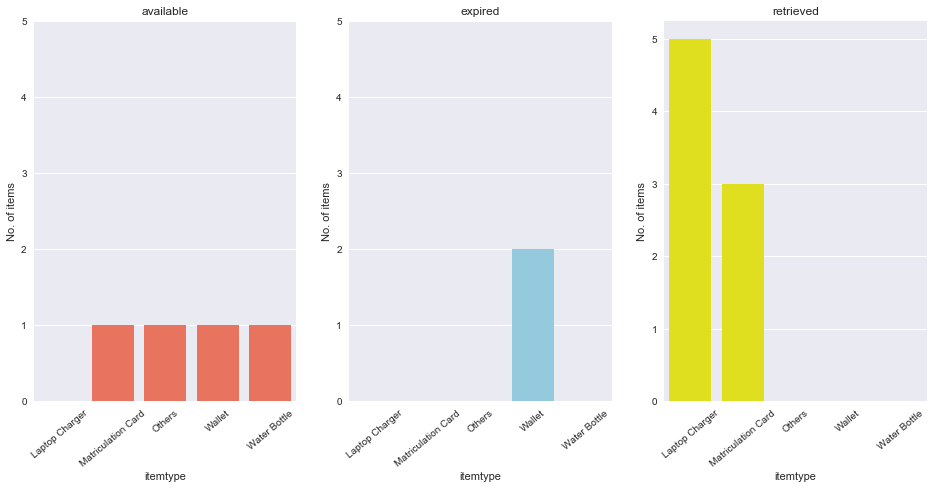

In [26]:
fig = plt.figure(figsize=(16, 7))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)


sns.barplot(x=status2_pivot['itemtype'], y=status2_pivot['available'], ax=ax1
           ,color="tomato")
ax1.set_ylabel("No. of items")
ax1.set_title("available")
ax1.set_yticks(np.arange(0, 6))
ax1.set_xticklabels(status2_pivot['itemtype'], rotation=40)

sns.barplot(x=status2_pivot['itemtype'], y=status2_pivot['expired'], ax=ax2
           ,color="skyblue")
ax2.set_title("expired")
ax2.set_ylabel("No. of items")
ax2.set_yticks(np.arange(0, 6))
ax2.set_xticklabels(status2_pivot['itemtype'], rotation=40)

sns.barplot(x=status2_pivot['itemtype'], y=status2_pivot['retrieved'], ax=ax3
           ,color="yellow")
ax3.set_title("retrieved")
ax3.set_ylabel("No. of items")
ax3.set_yticks(np.arange(0, 6))
ax3.set_xticklabels(status2_pivot['itemtype'], rotation=40)

plt.show()

<hr>
## 3.1.2 Item type distribution by status - Combined

Let's now break down our analysis to dive into the distribution of status based on each item type.

In [27]:
status4_pivot = pd.pivot_table(status2, index=['status'], columns=['itemtype'],
                                       values='No. of items reported found', aggfunc=np.sum)
status4_pivot = status4_pivot.reset_index()
status4_pivot

itemtype,status,Laptop Charger,Matriculation Card,Others,Wallet,Water Bottle
0,available,nan,1.00,1.00,1.00,1.00
1,expired,nan,nan,nan,2.00,nan
2,retrieved,5.00,3.00,nan,nan,nan


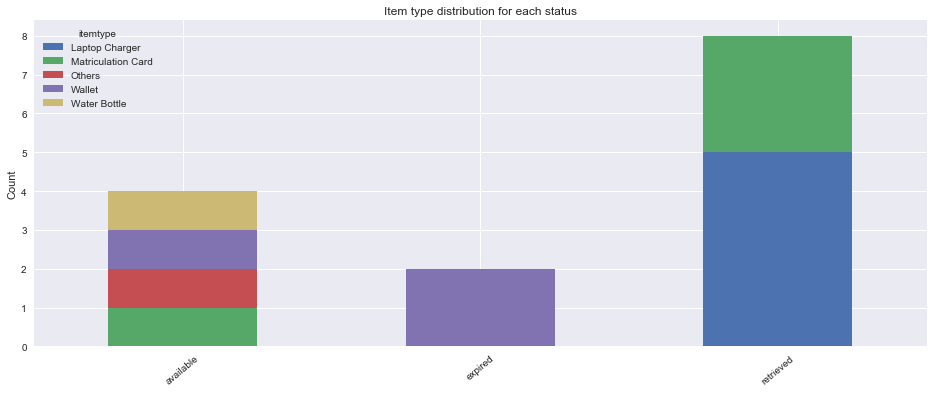

In [28]:
fig, ax1 = plt.subplots()
status4_pivot.plot(kind='bar', stacked=True, 
                                  figsize=DIMS, title="Item type distribution for each status",
                                   ax=ax1)
ax1.set_ylabel("Count")
ax1.set_xticklabels(status4_pivot['status'], rotation=40)

plt.show()

<hr>
## 3.2 Status distribution by item type

Let's now break down our analysis to dive into the distribution of status based on each item type.

In [29]:
status3_pivot = status2_pivot.set_index('itemtype')
status3_pivot

status,available,expired,retrieved
itemtype,,,
Laptop Charger,nan,nan,5.00
Matriculation Card,1.00,nan,3.00
Others,1.00,nan,nan
Wallet,1.00,2.00,nan
Water Bottle,1.00,nan,nan


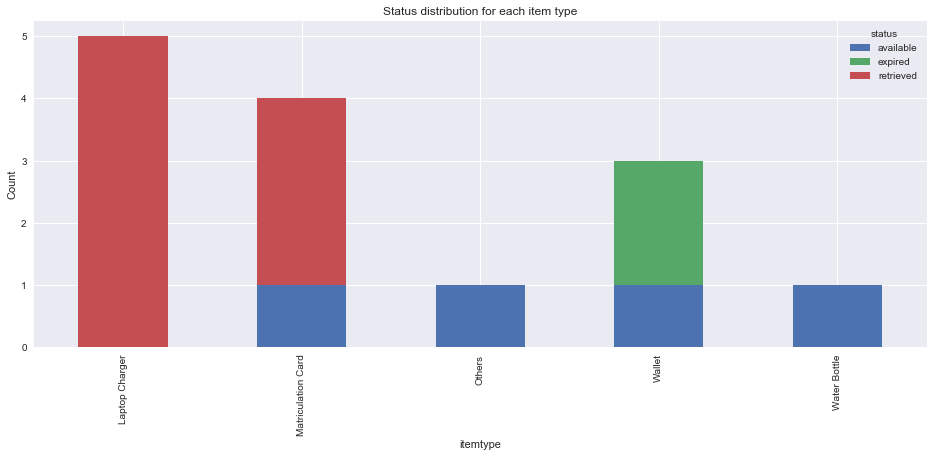

In [36]:
fig, ax1 = plt.subplots()
status3_pivot.plot(kind='bar', stacked=True, 
                                  figsize=DIMS, title="Status distribution for each item type",
                                   ax=ax1)
ax1.set_ylabel("Count")

plt.show()

<img src="img/image.png" alt="Drawing" style="width: 200px;"/>